In [283]:
#importing dependencies
import matplotlib.pyplot as plt;
import pandas as pd;
import scipy.stats as st;
import numpy as np;

# Importing and merging datasets

In [284]:
#Data files
mouse_metadata_path = 'Resources/Mouse_metadata.csv';
study_results_path = 'Resources/Study_results.csv';

#Reading in the data
mouse_metadata = pd.read_csv(mouse_metadata_path);
study_results = pd.read_csv(study_results_path);

#previewing column values for both data sets
print(mouse_metadata.columns);
print(study_results.columns);

#Merging the two data sets on their common column: Mouse ID
SCC_growth = mouse_metadata.merge(study_results , on= 'Mouse ID');

#Previewing merged data frame SCC_growth
SCC_growth.head(5)


Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')
Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


# Cleaning Data (Drop Duplicates)

In [285]:
#checking for unique number of mice
mice_count = len(SCC_growth['Mouse ID'].unique())
print(mice_count);

#The duplicate rows in our dataset
duplicate_timepoints = SCC_growth[SCC_growth[['Timepoint' , 'Mouse ID']].duplicated() == True];

#Obtaining the unique Mice ID with duplicate timepoints
duplicate_mice = list(duplicate_timepoints['Mouse ID'].unique());
#its just g989

#The full data associated with duplicate values
duplicate_data = SCC_growth[(SCC_growth['Mouse ID'] == 'g989')==True];

 #dropping all Mice ID's associated with duplicates
SCC_growth.drop(list(SCC_growth[SCC_growth['Mouse ID'] == 'g989'].index) , inplace= True);

#Checking the new count of mice ID's
new_mice_count = len(SCC_growth['Mouse ID'].unique());
print(new_mice_count);






249
248


# Summary Statistics

In [286]:
#summary stats table for every drug regimen , includes: mean , median , variance , std , SEM

#Finding unique drug regimens
unique_drugs =  SCC_growth['Drug Regimen'].unique();

#empty list to contain lists storing specific drug regimen calculation
tumor_regimens = [];

#list contains regimen dataframes for use downstream
drug_regimens = [];

#grouping SCC_growth by by a specific drug regimen
for drug in unique_drugs:

    #SCC_growth view of current regimen
    regimen_view = SCC_growth[SCC_growth['Drug Regimen'] == drug];

    #subsetting further to obtain a view of Tumor Volume (mm3)
    tumor_view = regimen_view['Tumor Volume (mm3)'];

    #list to contain regimen specific information
    current_regimen = [];

    #appending current_regimen with subset calculations
    current_regimen.append(tumor_view.mean());
    current_regimen.append(tumor_view.median());
    current_regimen.append(tumor_view.var());
    current_regimen.append(tumor_view.std());
    current_regimen.append(tumor_view.sem());

    #defining dataframe index and columns
    Index = ['mean' , 'median' , 'variance' , 'std' , 'SEM'];
    Columns = [drug];

    #creating a summary dataframe for current_regimen's info
    curr_dataframe = pd.DataFrame(current_regimen , index = Index , columns= Columns)

    #appending drug_regimens
    drug_regimens.append(regimen_view);
    tumor_regimens.append(curr_dataframe)


tumor_volume_summary = pd.concat(tumor_regimens[:] , axis = 1);

tumor_volume_summary


,Ramicane,Capomulin,Infubinol,Placebo,Ceftamin,Stelasyn,Zoniferol,Ketapril,Propriva,Naftisol
mean,40.216745,40.675741,52.884795,54.033581,52.591172,54.233149,53.236507,55.235638,52.320930,54.331565
median,40.673236,41.557809,51.820584,52.288934,51.776157,52.431737,51.818479,53.698743,50.446266,52.509285
variance,23.486704,24.947764,43.128684,61.168083,39.290177,59.450562,48.533355,68.553577,43.852013,66.173479
std,4.846308,4.994774,6.567243,7.821003,6.268188,7.710419,6.966589,8.279709,6.622085,8.134708
SEM,0.320955,0.329346,0.492236,0.581331,0.469821,0.573111,0.516398,0.603860,0.544332,0.596466


# Bar and Pie Chart

<AxesSubplot:xlabel='Mouse ID'>

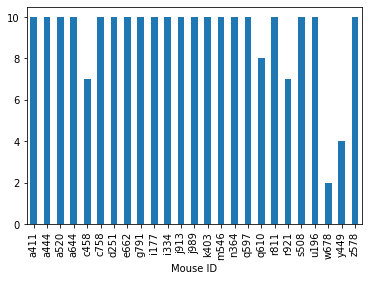

In [300]:
#Plotting number of time points per mice ID for each regimen

#Obtaining the total number of timepoints per Mouse ID in each regimen
ramicane_timepoints = drug_regimens[0].groupby('Mouse ID')['Timepoint'].count()
labels = ramicane_timepoints.index

#plotting a bar plot using pandas
ramicane_timepoints.plot.bar(x=labels)


pandas.core.series.Series